<a href="https://colab.research.google.com/github/seshadrite/aimlexercises/blob/main/exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Load the CSV file from GitHub
import pandas as pd
import requests
import io
github_csv_url = "https://raw.githubusercontent.com/seshadrite/aimlexercises/main/exercise1.csv"
try:
    response = requests.get(github_csv_url)
    response.raise_for_status()  # Raise an HTTPError for bad responses (4xx or 5xx)

    # Read the content into a pandas DataFrame
    df = pd.read_csv(io.StringIO(response.text))
    print("CSV loaded successfully!")
    print(df.head())
    # Perform NULL Checks
    df.info()
    df.isnull().sum()


except requests.exceptions.RequestException as e:
    print(f"Error fetching the CSV file: {e}")
    print("Please ensure the URL is correct and accessible.")
except pd.errors.EmptyDataError:
    print("Error: No data to parse. The CSV file might be empty.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

CSV loaded successfully!
   Experience (yrs)  Training Hours  Working Hours  Projects  \
0                 2              40             38         3   
1                 5              60             42         6   
2                 1              20             35         2   
3                 8              80             45         8   
4                 4              50             40         5   

   Productivity Score  
0                  62  
1                  78  
2                  55  
3                  88  
4                  72  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Experience (yrs)    10 non-null     int64
 1   Training Hours      10 non-null     int64
 2   Working Hours       10 non-null     int64
 3   Projects            10 non-null     int64
 4   Productivity Score  10 non-null     int64
dtypes: int64(5)

In [4]:
# •	Which factor most strongly impacts productivity?

correlation_matrix = df.corr()
productivity_correlations = correlation_matrix['Productivity Score']

# Drop self-correlation
productivity_correlations = productivity_correlations.drop('Productivity Score')

# Get column with highest correlation
max_feature = productivity_correlations.idxmax()
max_value = productivity_correlations.max()

print(f"Highest correlated feature: {max_feature}")
print(f"Correlation value: {max_value}")

Highest correlated feature: Projects
Correlation value: 0.9956956788596761


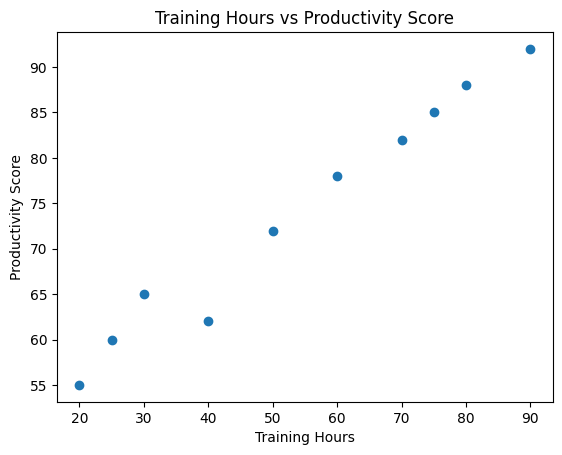

In [5]:
#	How does Training Hours affect productivity?
import matplotlib.pyplot as plt

training_hours_sorted, productivity_sorted = zip(
    *sorted(zip(df['Training Hours'], df['Productivity Score']))
)
# Plot line graph
plt.figure()
plt.scatter(training_hours_sorted, productivity_sorted, marker='o')
plt.xlabel("Training Hours")
plt.ylabel("Productivity Score")
plt.title("Training Hours vs Productivity Score")
plt.show()

# As per the plot Training has a positive correlation with producitivity overall, except for the duration between 30-40.





In [21]:
#	Should the company increase training hours or working hours?

# -----------------------------
# 1. Correlation analysis
# -----------------------------
print("Correlation Matrix:\n")
print(df.corr())
print("\n")

X = df.drop('Productivity Score', axis=1)
y = df['Productivity Score']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("X Scaled\n")
print(X_scaled)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Calculate R-squared both with Training & Working Hours

r_squared = r2_score(y_test, y_pred)
print(f"R-squared WITH TRAINING & WORKING HOURS : {r_squared:.4f}")

# Calculate other regression accuracy metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


X_NWH = X.drop("Working Hours",axis=1)
XNWH_scaled = scaler.fit_transform(X_NWH)
print("X Scaled\n")
print(XNWH_scaled)

X_train, X_test, y_train, y_test = train_test_split(XNWH_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print(f"R-squared WITHOUT Working Hours : {r_squared:.4f}")

X_NTH = X.drop("Training Hours",axis=1)
X_NTH_scaled = scaler.fit_transform(X_NTH)
print("X Scaled\n")
print(X_NTH_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_NTH_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print(f"R-squared WITHOUT Training Hours: {r_squared:.4f}")

# R-squared WITH TRAINING & WORKING HOURS : 0.3146
# R-squared WITHOUT Working Hours : 0.7269
# R-squared WITHOUT Training Hours: 0.8438



#	Answer : Given the high colinearity between Training and Working Hours, and Working Hours can be enough as R2 is high given multi-colinearity problem.



Correlation Matrix:

                    Experience (yrs)  Training Hours  Working Hours  Projects  \
Experience (yrs)            1.000000        0.969810       0.973178  0.988194   
Training Hours              0.969810        1.000000       0.993132  0.977151   
Working Hours               0.973178        0.993132       1.000000  0.974701   
Projects                    0.988194        0.977151       0.974701  1.000000   
Productivity Score          0.981991        0.987045       0.985684  0.995696   

                    Productivity Score  
Experience (yrs)              0.981991  
Training Hours                0.987045  
Working Hours                 0.985684  
Projects                      0.995696  
Productivity Score            1.000000  


X Scaled

[[-1.00514142 -0.59750544 -0.71706255 -1.06904497]
 [ 0.07179582  0.25607376  0.20817945  0.26726124]
 [-1.3641205  -1.45108464 -1.41099406 -1.51448037]
 [ 1.14873305  1.10965296  0.90211095  1.15813205]
 [-0.28718326 -0.17071584 -0.2

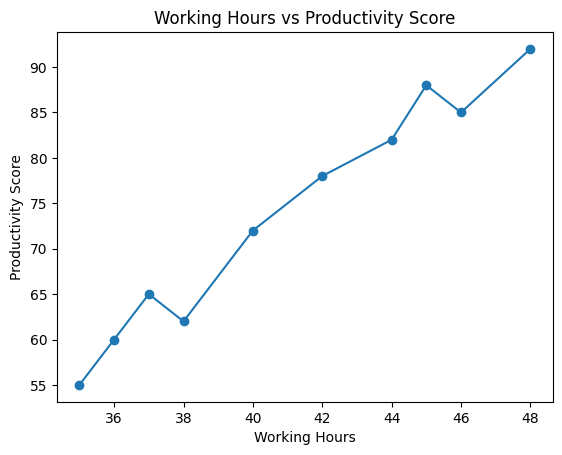

In [7]:
#	What happens if Working Hours increase beyond optimal limits?

working_hours_sorted, productivity_sorted = zip(
    *sorted(zip(df['Working Hours'], df['Productivity Score']))
)
# Plot line graph
plt.figure()
plt.plot(working_hours_sorted, productivity_sorted, marker='o')
plt.xlabel("Working Hours")
plt.ylabel("Productivity Score")
plt.title("Working Hours vs Productivity Score")
plt.show()

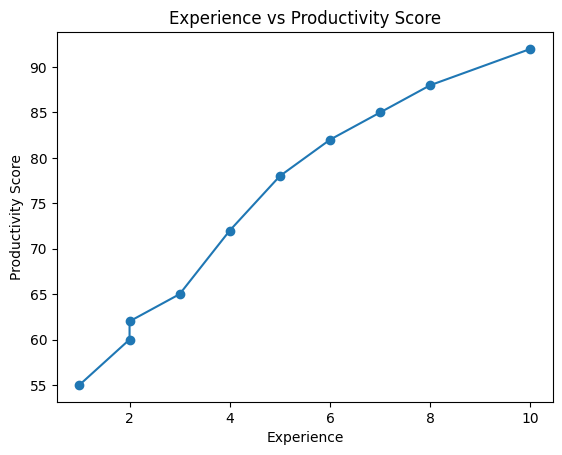

In [26]:
#	Can productivity ever decrease with more experience?

import matplotlib.pyplot as plt

training_hours_sorted, productivity_sorted = zip(
    *sorted(zip(df['Experience (yrs)'], df['Productivity Score']))
)
# Plot line graph
plt.figure()
plt.plot(training_hours_sorted, productivity_sorted, marker='o')
plt.xlabel("Experience")
plt.ylabel("Productivity Score")
plt.title("Experience vs Productivity Score")
plt.show()

# No. When they are same e.g, and combined with more training hours, it is likely to increase productivity only.



In [11]:
# How would you detect overfitting in this model?



array([[-1.00514142, -0.59750544, -0.71706255, -1.06904497],
       [ 0.07179582,  0.25607376,  0.20817945,  0.26726124],
       [-1.3641205 , -1.45108464, -1.41099406, -1.51448037],
       [ 1.14873305,  1.10965296,  0.90211095,  1.15813205],
       [-0.28718326, -0.17071584, -0.25444155, -0.17817416],
       [ 1.86669121,  1.53644256,  1.59604246,  1.60356745],
       [-0.64616234, -1.02429504, -0.94837305, -0.62360956],
       [ 0.4307749 ,  0.68286336,  0.67080045,  0.71269665],
       [ 0.78975397,  0.89625816,  1.13342146,  0.71269665],
       [-1.00514142, -1.23768984, -1.17968356, -1.06904497]])